<a href="https://colab.research.google.com/github/ziyacanyldz/inme-tahmini/blob/main/D1_%C4%B0nmeVeriseti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd ; import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline 

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving inme_veriseti.csv to inme_veriseti.csv


In [ ]:
import io
veri = pd.read_csv(io.BytesIO(uploaded['inme_veriseti.csv']))
veri

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Çalışma tipi serbest meslek olanların inme geçirme oranı daha yüksek , ardından özel şirketlerde çalışanlar ve devlet kurumlarında çalışanlar geliyor.


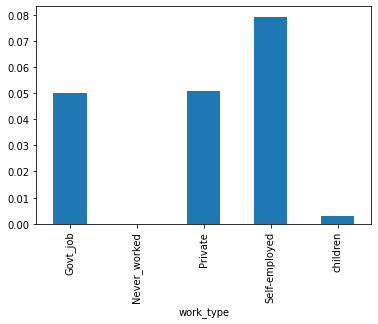

In [ ]:
grup = veri.groupby("work_type")
grup["stroke"].mean().plot(kind = "bar")

Hipertansiyonu olanların inme geçirme oranı daha yüksek

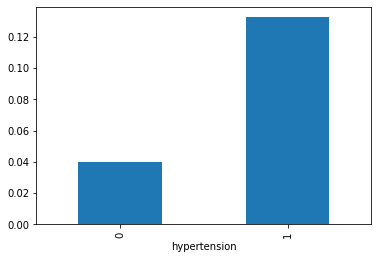

In [ ]:
grup2 = veri.groupby("hypertension")
grup2["stroke"].mean().plot(kind = "bar")

İnme hastalarının yaş ortalaması 60-70 arası. İnme hastası olmayanların yaş ortalaması 40-45 arası


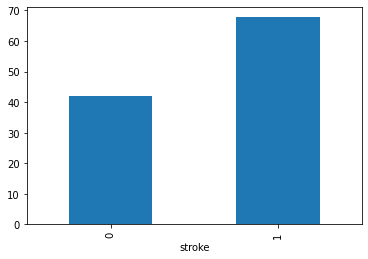

In [ ]:
grup3 = veri.groupby("stroke")
grup3["age"].mean().plot(kind = "bar")

Sigara içen veya önceden sigara kullananların inme geçirme oranı hiç içmeyen insanlara göre daha fazla

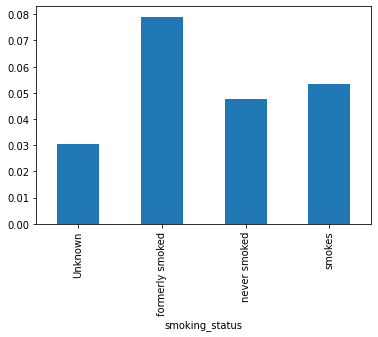

In [ ]:
grup4 = veri.groupby("smoking_status")
grup4["stroke"].mean().plot(kind = "bar")

Çalışma durumu ve sigara kullanma durumu ele alındığında inme geçirme oranı en yüksek olan grup serbest meslek yapıp önceden sigara kullanan insanlar.

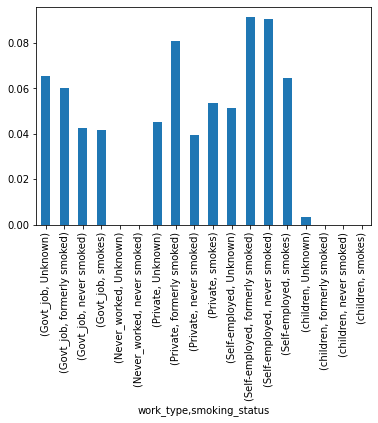

In [ ]:
grup5 = veri.groupby(["work_type","smoking_status"])
grup5["stroke"].mean().plot(kind = "bar")

Hipertansiyon ve kalp hastalığı durumu ele alındığında kalp hastası olanların inme geçirme oranı tansiyon hastalarına göre daha fazla. İki hastalığada birden sahip olan insanların inme geçirme oranı daha yüksek.

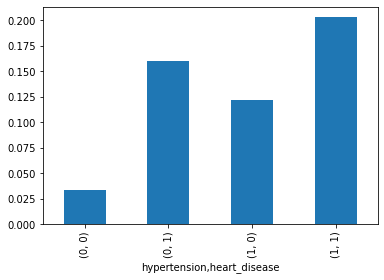

In [ ]:
grup6 = veri.groupby(["hypertension","heart_disease"])
grup6["stroke"].mean().plot(kind = "bar")

Cinsiyet ve evlilik durumu ele alındığında evli olanların inme geçirme oranı daha yüksek olduğu gözüküyor. İnme geçirme oranı en fazla olan grup evli ve erkek olanlar.

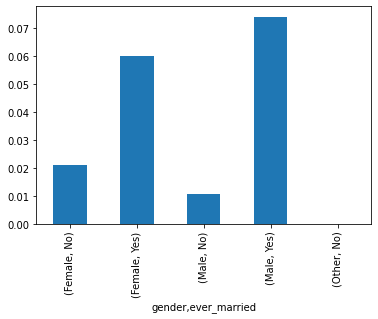

In [ ]:
grup7 = veri.groupby(["gender","ever_married"])
grup7["stroke"].mean().plot(kind = "bar")

İkamet türü ele alındığında şehirde yaşayanların inme geçirme oranı kırsalda yaşayanlara göre daha fazla.

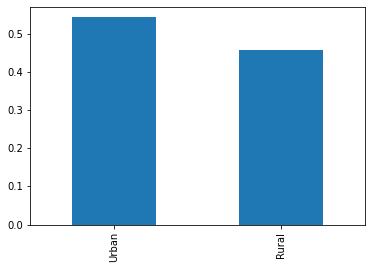

In [ ]:
veri[veri.stroke == 1].Residence_type.value_counts(normalize = True).plot(kind = "bar")

Aşağıdaki grafikte çalışma tipine göre sigara içme durumları incelenmiş.

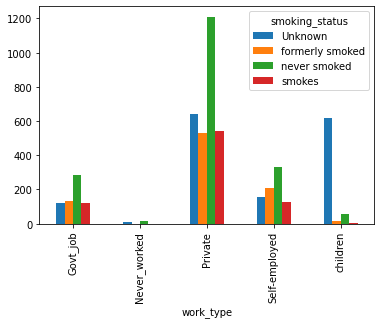

In [ ]:
calısma_tipi_sigara = pd.crosstab(veri["work_type"] , veri["smoking_status"])
calısma_tipi_sigara.plot.bar()

Evli olanların inme geçirme oranı daha yüksek.

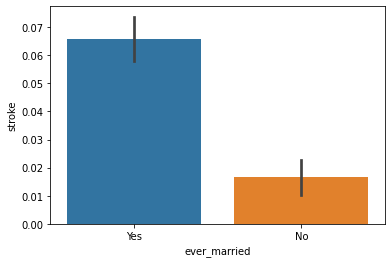

In [ ]:
import seaborn as sns 
sns.barplot(x="ever_married" , y="stroke" , data = veri , orient = "v")

Veri setindeki verilerin yaş dağılımı aşağıdaki gibidir. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


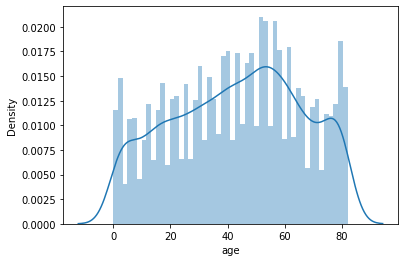

In [ ]:
sns.distplot(veri["age"] , bins=50)

Veri setindeki verilerin vücut kitle indeksi dağılımı aşağıdaki gibidir.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


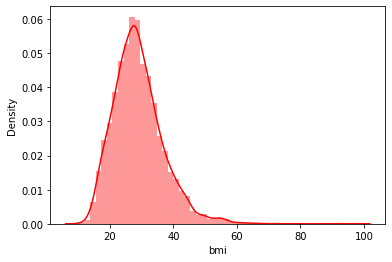

In [ ]:
sns.distplot(veri["bmi"] , bins=50 , color = "r")

Yaşın artmasıyla birlikte inme hastalarının sayısı da doğrusal olarak artıyor.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


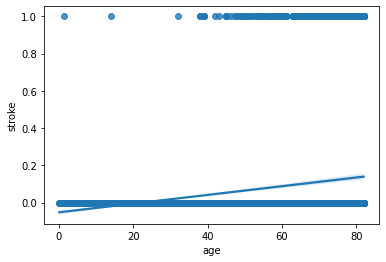

In [ ]:
sns.regplot("age" , "stroke" , data = veri)

Ortalama glikoz seviyesi arttıkça inme hastalarının sayısı da doğrusal olarak artıyor. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


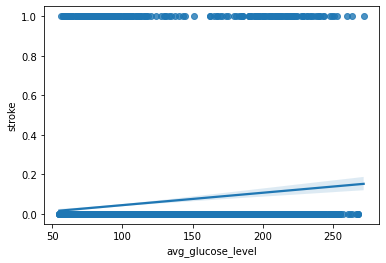

In [ ]:
sns.regplot("avg_glucose_level" , "stroke" , data = veri)

Vücut kitle indeksi arttıkça inme hastalarının sayısı da doğrusal olarak artıyor. Grafiğe göre bu artış eğrisi yukarıdaki yaş ve ortalama glikoz seviyesi grafiğiklerine kıyasla daha düşük gözüküyor.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


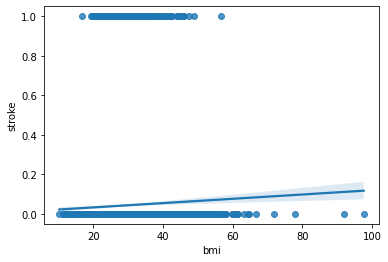

In [ ]:
sns.regplot("bmi" , "stroke" , data = veri)

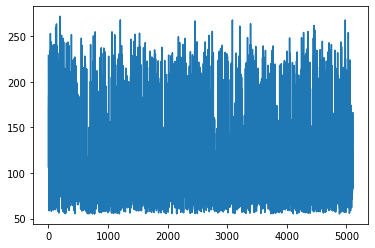

In [ ]:
veri.avg_glucose_level.plot()

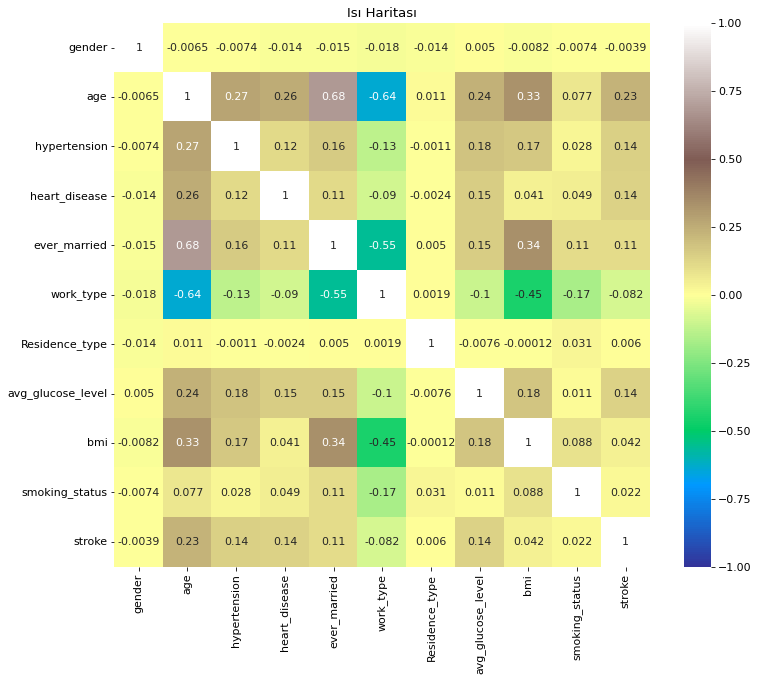

In [ ]:
korelasyon = veri.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(korelasyon, annot=True, vmin=-1.0, cmap="terrain")
plt.title("Isı Haritası")
plt.show()

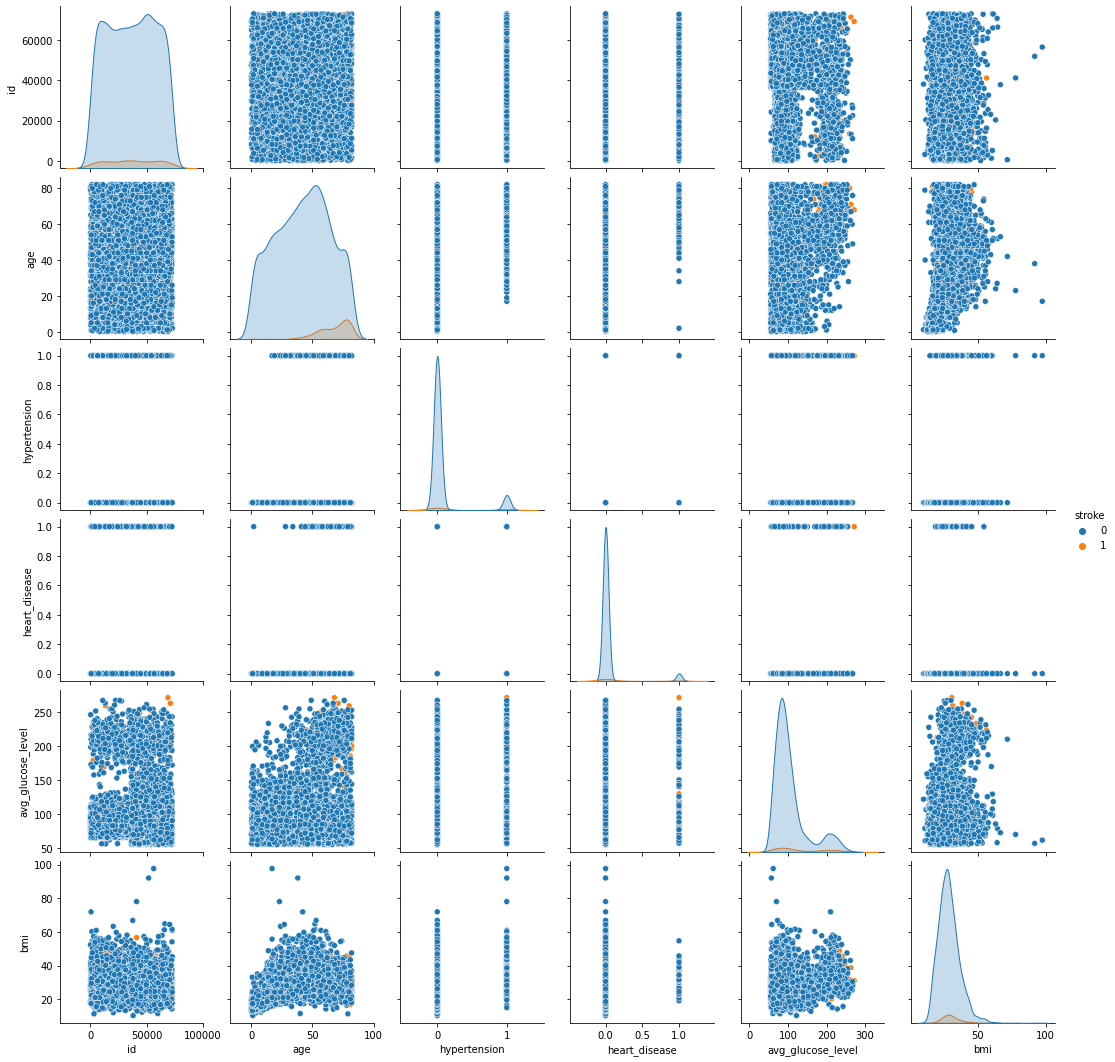

In [ ]:
sns.pairplot(veri , hue = "stroke")

In [ ]:
del veri["id"]

In [ ]:
veri.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
veri.dropna(subset=["bmi"],inplace=True)

In [ ]:
veri.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
veri['gender'] = veri['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
veri['Residence_type'] = veri['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
veri['work_type'] = veri['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)
veri['ever_married'] = veri['ever_married'].replace({'Yes':1, 'No':0}).astype(np.uint8)
veri['smoking_status'] = veri['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1}).astype(np.uint8)

In [ ]:
veri

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,2,1
2,0,80.0,0,1,1,0,0,105.92,32.5,0,1
3,1,49.0,0,0,1,0,1,171.23,34.4,255,1
4,1,79.0,1,0,1,1,0,174.12,24.0,0,1
5,0,81.0,0,0,1,0,1,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,1,13.0,0,0,0,255,0,103.08,18.6,1,0
5106,1,81.0,0,0,1,1,1,125.20,40.0,0,0
5107,1,35.0,0,0,1,1,0,82.99,30.6,0,0
5108,0,51.0,0,0,1,0,0,166.29,25.6,2,0


In [ ]:
veri['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [ ]:
x = veri.drop('stroke' , axis = 1)

In [ ]:
y = veri['stroke']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.20 ,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import BernoulliNB


models = {
    "             Logistic Regression      ": LogisticRegression(max_iter=1000),
    "             K-Nearest Neighbors      ": KNeighborsClassifier(),
    "               Decision Tree          ": DecisionTreeClassifier(),
    "             SVM (RBF Kernel)         ": SVC(),
    "              Neural Network          ": MLPClassifier(),
    "               Random Forest          ": RandomForestClassifier(),
    "             Gradient Boosting        ": GradientBoostingClassifier(),
    "                  XGBoost             ": XGBClassifier(eval_metric='mlogloss'),
    "                 Gaussian NB          ": GaussianNB(),
    "                BernoulliNB           ": BernoulliNB()
         
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + " algoritması eğitildi.")

             Logistic Regression       algoritması eğitildi.
             K-Nearest Neighbors       algoritması eğitildi.
               Decision Tree           algoritması eğitildi.
             SVM (RBF Kernel)          algoritması eğitildi.
              Neural Network           algoritması eğitildi.
               Random Forest           algoritması eğitildi.
             Gradient Boosting         algoritması eğitildi.
                  XGBoost              algoritması eğitildi.
                 Gaussian NB           algoritması eğitildi.
                BernoulliNB            algoritması eğitildi.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
print("\t\t\t\tModel Performansı TRAIN\n\t\t\t\t-----------------------")
for name, model in models.items():
    y_tahmin = model.predict(x_train)
    print(
        "\n" + name + " Doğruluk: {:.3f}%\n\t\t\t\t       F1-Score: {:.5f}"\
        .format(accuracy_score(y_train, y_tahmin) * 100, f1_score(y_train, y_tahmin))
    )
print("\n\n\t\t\t\tModel Performansı TEST\n\t\t\t\t----------------------")
for name, model in models.items():
    y_tahmin = model.predict(x_test)
    print(
        "\n" + name + " Doğruluk: {:.3f}%\n\t\t\t\t       F1-Score: {:.5f}"\
        .format(accuracy_score(y_test, y_tahmin) * 100, f1_score(y_test, y_tahmin))
    )

				Model Performansı TRAIN
				-----------------------

             Logistic Regression       Doğruluk: 96.002%
				       F1-Score: 0.01258

             K-Nearest Neighbors       Doğruluk: 95.849%
				       F1-Score: 0.07910

               Decision Tree           Doğruluk: 100.000%
				       F1-Score: 1.00000

             SVM (RBF Kernel)          Doğruluk: 95.977%
				       F1-Score: 0.00000

              Neural Network           Doğruluk: 96.028%
				       F1-Score: 0.07143

               Random Forest           Doğruluk: 100.000%
				       F1-Score: 1.00000

             Gradient Boosting         Doğruluk: 96.639%
				       F1-Score: 0.28261

                  XGBoost              Doğruluk: 96.104%
				       F1-Score: 0.06135

                 Gaussian NB           Doğruluk: 51.846%
				       F1-Score: 0.13217

                BernoulliNB            Doğruluk: 95.977%
				       F1-Score: 0.00000


				Model Performansı TEST
				----------------------

             Lo

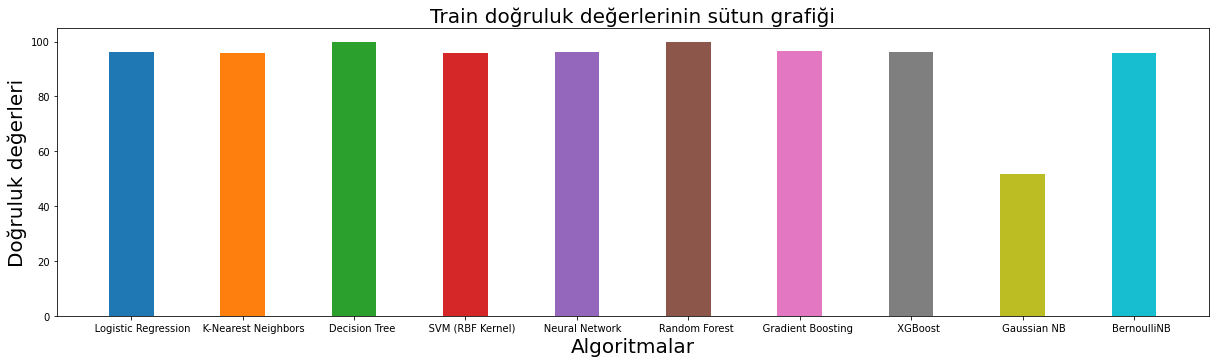

In [ ]:
fig = plt.figure(figsize=(16,4))

ax = fig.add_axes([0,0,1,1])

for name, model in models.items():
    y_tahmin = model.predict(x_train)
    ax.bar(name, accuracy_score(y_train, y_tahmin) * 100, width=0.4, )

plt.title("Train doğruluk değerlerinin sütun grafiği", fontsize = 20)
plt.xlabel('Algoritmalar', fontsize = 20)
plt.ylabel('Doğruluk değerleri', fontsize = 20)
plt.rcParams.update({'font.size': 11})


plt.show()

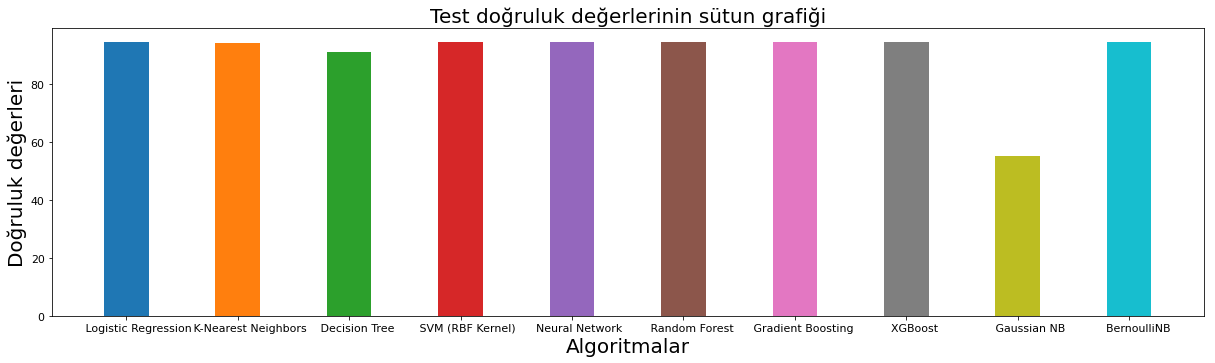

In [ ]:
fig = plt.figure(figsize=(16,4))

ax = fig.add_axes([0,0,1,1])

for name, model in models.items():
    y_tahmin = model.predict(x_test)
    ax.bar(name, accuracy_score(y_test, y_tahmin) * 100, width=0.4, )

plt.title("Test doğruluk değerlerinin sütun grafiği", fontsize = 20)
plt.xlabel('Algoritmalar', fontsize = 20)
plt.ylabel('Doğruluk değerleri', fontsize = 20)
plt.rcParams.update({'font.size': 11})


plt.show()

In [ ]:
#modellere göre confusion matrixi ile dengesizliklere baktık

from sklearn.metrics import confusion_matrix

for name, model in models.items():
    y_tahmin = model.predict(x_test)
    print(name, "\n", confusion_matrix(y_test , y_tahmin, labels=[0,1]), "\n")

             Logistic Regression       
 [[931   0]
 [ 51   0]] 

             K-Nearest Neighbors       
 [[926   5]
 [ 50   1]] 

               Decision Tree           
 [[891  40]
 [ 45   6]] 

             SVM (RBF Kernel)          
 [[931   0]
 [ 51   0]] 

              Neural Network           
 [[931   0]
 [ 51   0]] 

               Random Forest           
 [[930   1]
 [ 51   0]] 

             Gradient Boosting         
 [[931   0]
 [ 51   0]] 

                  XGBoost              
 [[931   0]
 [ 51   0]] 

                 Gaussian NB           
 [[494 437]
 [  4  47]] 

                BernoulliNB            
 [[931   0]
 [ 51   0]] 



             Logistic Regression       0.5
             K-Nearest Neighbors       0.5071186369284555
               Decision Tree           0.5373412522903899
             SVM (RBF Kernel)          0.5
              Neural Network           0.5
               Random Forest           0.49946294307196565
             Gradient Boosting         0.5
                  XGBoost              0.5
                 Gaussian NB           0.7260904361744697
                BernoulliNB            0.5


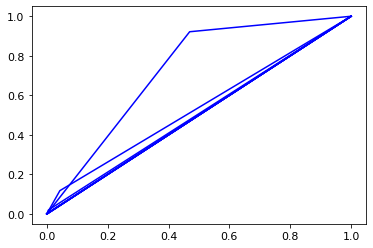

In [ ]:
import sklearn.metrics as metrics


for name, model in models.items():
    y_tahmin = model.predict(x_test)
    fpr , tpr , thresholds = metrics.roc_curve(y_test , y_tahmin)
    roc_auc = metrics.auc(fpr , tpr)
    plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
    print(name, roc_auc)

In [ ]:
models2 = {
    "             Logistic Regression      ": LogisticRegression(C= 0.03359818286283781, max_iter= 1000, penalty= 'l2'),
    "             K-Nearest Neighbors      ": KNeighborsClassifier(n_neighbors=16, p=2),
    "               Decision Tree          ": DecisionTreeClassifier(criterion= 'entropy', max_depth= 4),
    "             SVM (RBF Kernel)         ": SVC(C= 0.0001, gamma= 0.001),
    "              Neural Network          ": MLPClassifier(activation= 'tanh', alpha= 0.0001, hidden_layer_sizes= (100,), learning_rate= 'constant', max_iter= 1000, solver= 'adam'),
    "               Random Forest          ": RandomForestClassifier(max_depth= 15, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 1200),
    "             Gradient Boosting        ": GradientBoostingClassifier(learning_rate= 0.001, loss= 'deviance', max_depth= 3, n_estimators= 10, subsample= 0.5),
    "                  XGBoost             ": XGBClassifier(learning_rate= 0.01, max_depth= 2, n_estimators= 100),
    "                 Gaussian NB          ": GaussianNB(var_smoothing= 0.23101297000831597),
    "                BernoulliNB           ": BernoulliNB(alpha= 10.0)
         
}

for name, model in models2.items():
    model.fit(x_train, y_train)
    print(name + " algoritması eğitildi.")

             Logistic Regression       algoritması eğitildi.
             K-Nearest Neighbors       algoritması eğitildi.
               Decision Tree           algoritması eğitildi.
             SVM (RBF Kernel)          algoritması eğitildi.
              Neural Network           algoritması eğitildi.
               Random Forest           algoritması eğitildi.
             Gradient Boosting         algoritması eğitildi.
                  XGBoost              algoritması eğitildi.
                 Gaussian NB           algoritması eğitildi.
                BernoulliNB            algoritması eğitildi.


In [ ]:
print("\t\t\t\tModel Performansı TRAIN\n\t\t\t\t-----------------------")
for name, model in models2.items():
    y_tahmin = model.predict(x_train)
    print(
        "\n" + name + " Doğruluk: {:.3f}%\n\t\t\t\t       F1-Score: {:.5f}"\
        .format(accuracy_score(y_train, y_tahmin) * 100, f1_score(y_train, y_tahmin))
    )
print("\n\n\t\t\t\tModel Performansı TEST\n\t\t\t\t----------------------")
for name, model in models2.items():
    y_tahmin = model.predict(x_test)
    print(
        "\n" + name + " Doğruluk: {:.3f}%\n\t\t\t\t       F1-Score: {:.5f}"\
        .format(accuracy_score(y_test, y_tahmin) * 100, f1_score(y_test, y_tahmin))
    )

				Model Performansı TRAIN
				-----------------------

             Logistic Regression       Doğruluk: 95.977%
				       F1-Score: 0.00000

             K-Nearest Neighbors       Doğruluk: 95.977%
				       F1-Score: 0.00000

               Decision Tree           Doğruluk: 96.053%
				       F1-Score: 0.08284

             SVM (RBF Kernel)          Doğruluk: 95.977%
				       F1-Score: 0.00000

              Neural Network           Doğruluk: 95.977%
				       F1-Score: 0.00000

               Random Forest           Doğruluk: 97.352%
				       F1-Score: 0.50943

             Gradient Boosting         Doğruluk: 95.977%
				       F1-Score: 0.00000

                  XGBoost              Doğruluk: 95.977%
				       F1-Score: 0.00000

                 Gaussian NB           Doğruluk: 96.028%
				       F1-Score: 0.03704

                BernoulliNB            Doğruluk: 95.977%
				       F1-Score: 0.00000


				Model Performansı TEST
				----------------------

             Logi

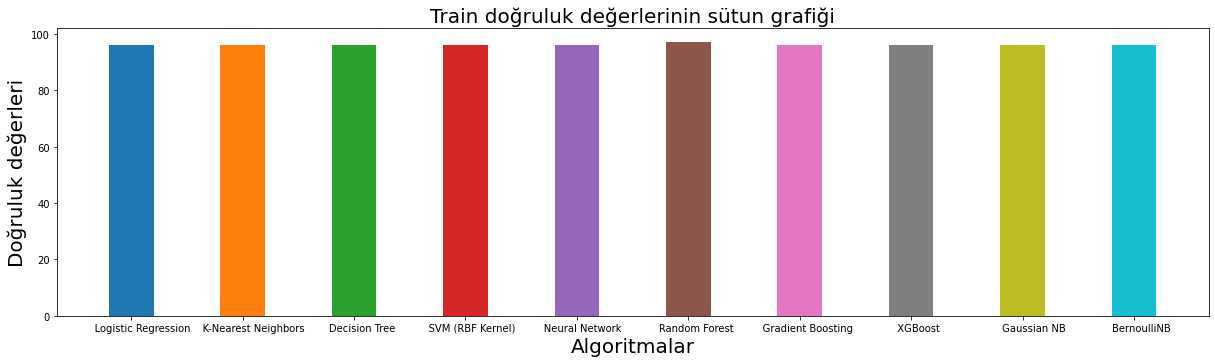

In [ ]:
fig = plt.figure(figsize=(16,4))

ax = fig.add_axes([0,0,1,1])

for name, model in models2.items():
    y_tahmin = model.predict(x_train)
    ax.bar(name, accuracy_score(y_train, y_tahmin) * 100, width=0.4, )

plt.title("Train doğruluk değerlerinin sütun grafiği", fontsize = 20)
plt.xlabel('Algoritmalar', fontsize = 20)
plt.ylabel('Doğruluk değerleri', fontsize = 20)
plt.rcParams.update({'font.size': 11})


plt.show()

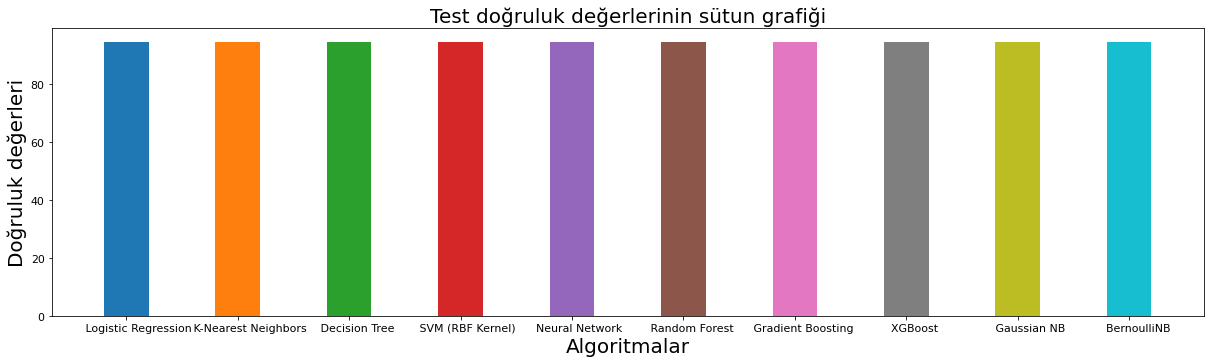

In [ ]:
fig = plt.figure(figsize=(16,4))

ax = fig.add_axes([0,0,1,1])

for name, model in models2.items():
    y_tahmin = model.predict(x_test)
    ax.bar(name, accuracy_score(y_test, y_tahmin) * 100, width=0.4, )

plt.title("Test doğruluk değerlerinin sütun grafiği", fontsize = 20)
plt.xlabel('Algoritmalar', fontsize = 20)
plt.ylabel('Doğruluk değerleri', fontsize = 20)
plt.rcParams.update({'font.size': 11})


plt.show()

In [ ]:
#modellere göre confusion matrixi ile dengesizliklere baktık

from sklearn.metrics import confusion_matrix

for name, model in models2.items():
    y_tahmin = model.predict(x_test)
    print(name, "\n", confusion_matrix(y_test , y_tahmin, labels=[0,1]), "\n")

             Logistic Regression       
 [[931   0]
 [ 51   0]] 

             K-Nearest Neighbors       
 [[931   0]
 [ 51   0]] 

               Decision Tree           
 [[928   3]
 [ 51   0]] 

             SVM (RBF Kernel)          
 [[931   0]
 [ 51   0]] 

              Neural Network           
 [[931   0]
 [ 51   0]] 

               Random Forest           
 [[931   0]
 [ 51   0]] 

             Gradient Boosting         
 [[931   0]
 [ 51   0]] 

                  XGBoost              
 [[931   0]
 [ 51   0]] 

                 Gaussian NB           
 [[931   0]
 [ 51   0]] 

                BernoulliNB            
 [[931   0]
 [ 51   0]] 



             Logistic Regression       0.5
             K-Nearest Neighbors       0.5
               Decision Tree           0.4983888292158969
             SVM (RBF Kernel)          0.5
              Neural Network           0.5
               Random Forest           0.5
             Gradient Boosting         0.5
                  XGBoost              0.5
                 Gaussian NB           0.5
                BernoulliNB            0.5


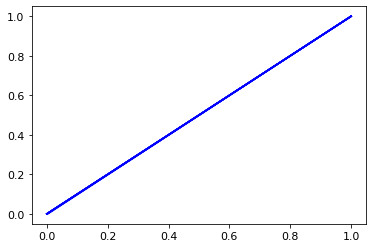

In [ ]:
import sklearn.metrics as metrics


for name, model in models2.items():
    y_tahmin = model.predict(x_test)
    fpr , tpr , thresholds = metrics.roc_curve(y_test , y_tahmin)
    roc_auc = metrics.auc(fpr , tpr)
    plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
    print(name, roc_auc)